In [1]:
import pandas as pd
import numpy as np 
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns 
import folium
from folium import Choropleth

In [2]:
# Rental History Data
one_bed_flat = pd.read_csv('../data/raw/rental_history/one_bed_flat.csv')
two_bed_flat = pd.read_csv('../data/raw/rental_history/two_bed_flat.csv')
three_bed_flat = pd.read_csv('../data/raw/rental_history/three_bed_flat.csv')
two_bed_house = pd.read_csv('../data/raw/rental_history/two_bed_house.csv')
three_bed_house = pd.read_csv('../data/raw/rental_history/three_bed_house.csv')
four_bed_house = pd.read_csv('../data/raw/rental_history/four_bed_house.csv')
all_properties = pd.read_csv('../data/raw/rental_history/all_properties.csv')

# Domain Rental Data
domain_one_bed_flat = pd.read_csv('../data/curated/domain_one_bed_flat_rent.csv')
domain_two_bed_flat = pd.read_csv('../data/curated/domain_two_bed_flat_rent.csv')
domain_three_bed_flat = pd.read_csv('../data/curated/domain_three_bed_flat_rent.csv')
domain_two_bed_house = pd.read_csv('../data/curated/domain_two_bed_house_rent.csv')
domain_three_bed_house = pd.read_csv('../data/curated/domain_three_bed_house_rent.csv')
domain_four_bed_house = pd.read_csv('../data/curated/domain_four_bed_house.csv')
domain_all_properties = pd.read_csv('../data/curated/domain_all_properties_rent.csv')

In [3]:
# Load Victoria suburbs shapefile for filtering
vic_suburbs_gdf = gpd.read_file('../data/map/Vic_Localities/gda2020_vicgrid/esrishape/whole_of_dataset/victoria/VMADMIN/LOCALITY_POLYGON.shp')
vic_suburbs_gdf = vic_suburbs_gdf.to_crs(epsg=4326)
vic_suburbs_gdf['suburb'] = vic_suburbs_gdf['GAZLOC'].str.lower()

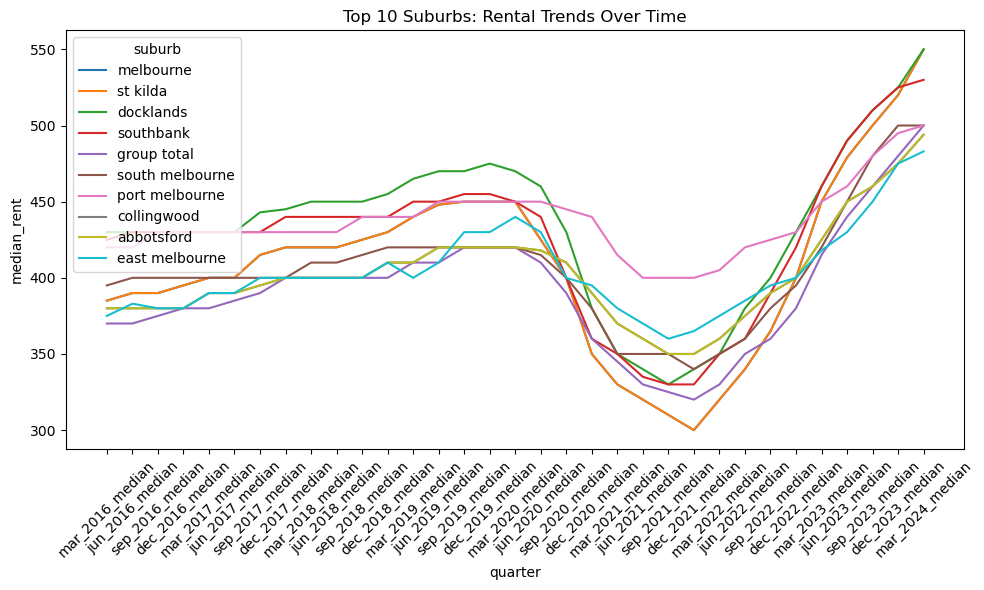

In [4]:
# Sort by the average rent and pick the top 10 suburbs
top_10_suburbs = one_bed_flat.sort_values(by='mar_2024_median', ascending=False).head(10)

# Melt the data for these top suburbs to visualize over time
top_10_melted = top_10_suburbs.melt(id_vars=['suburb'], var_name='quarter', value_name='median_rent')

# Plot the rental trends for top 10 suburbs
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_10_melted, x='quarter', y='median_rent', hue='suburb')
plt.xticks(rotation=45)
plt.title('Top 10 Suburbs: Rental Trends Over Time')
plt.tight_layout()
plt.show()


/var/folders/bz/yjywszk15kxc8d5vv73k9xcc0000gn/T/ipykernel_28711/258792634.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental_data['suburb'] = rental_data['suburb'].str.lower()


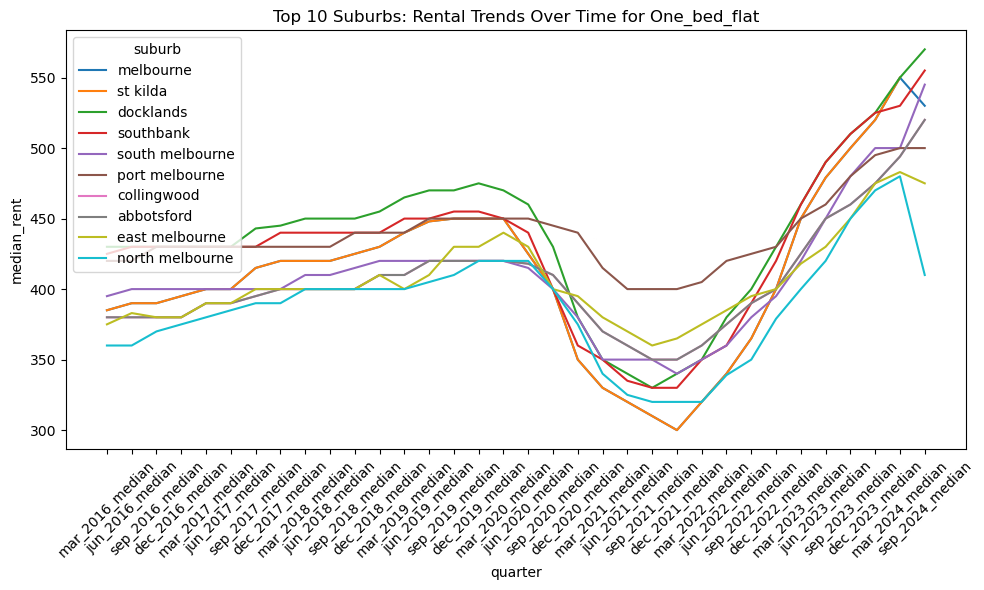

/var/folders/bz/yjywszk15kxc8d5vv73k9xcc0000gn/T/ipykernel_28711/258792634.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental_data['suburb'] = rental_data['suburb'].str.lower()


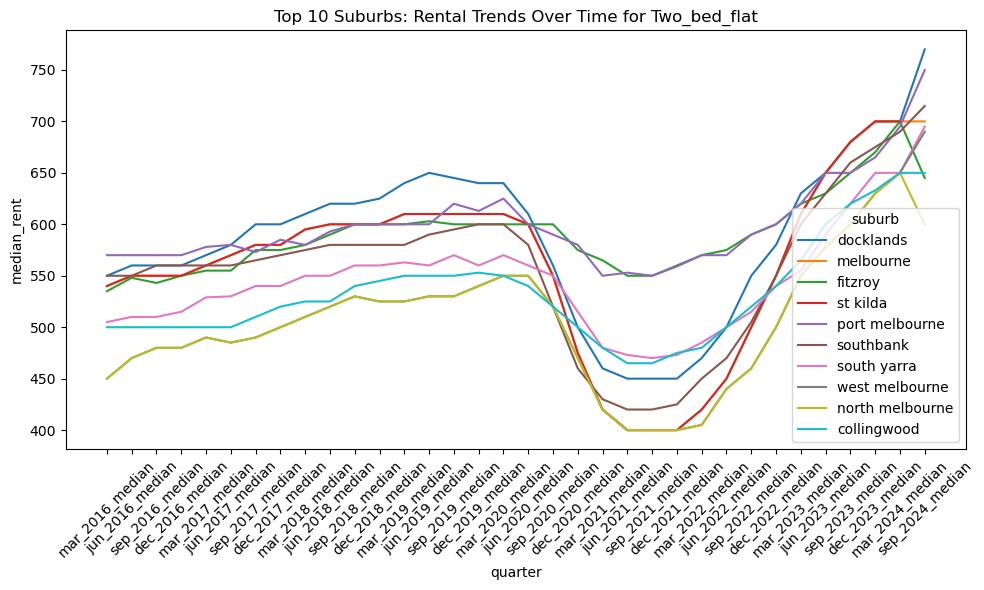

/var/folders/bz/yjywszk15kxc8d5vv73k9xcc0000gn/T/ipykernel_28711/258792634.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental_data['suburb'] = rental_data['suburb'].str.lower()


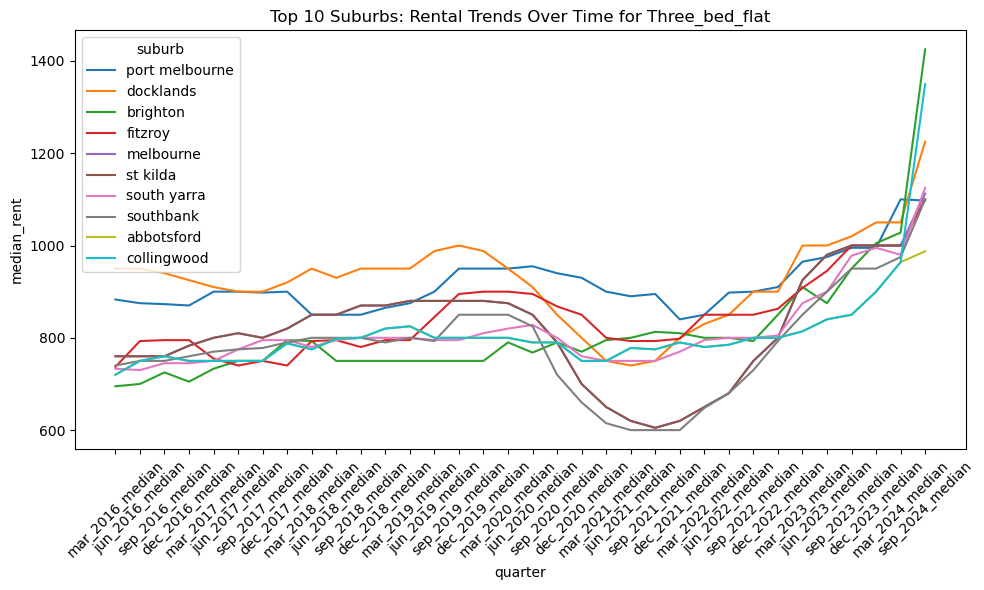

/var/folders/bz/yjywszk15kxc8d5vv73k9xcc0000gn/T/ipykernel_28711/258792634.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental_data['suburb'] = rental_data['suburb'].str.lower()


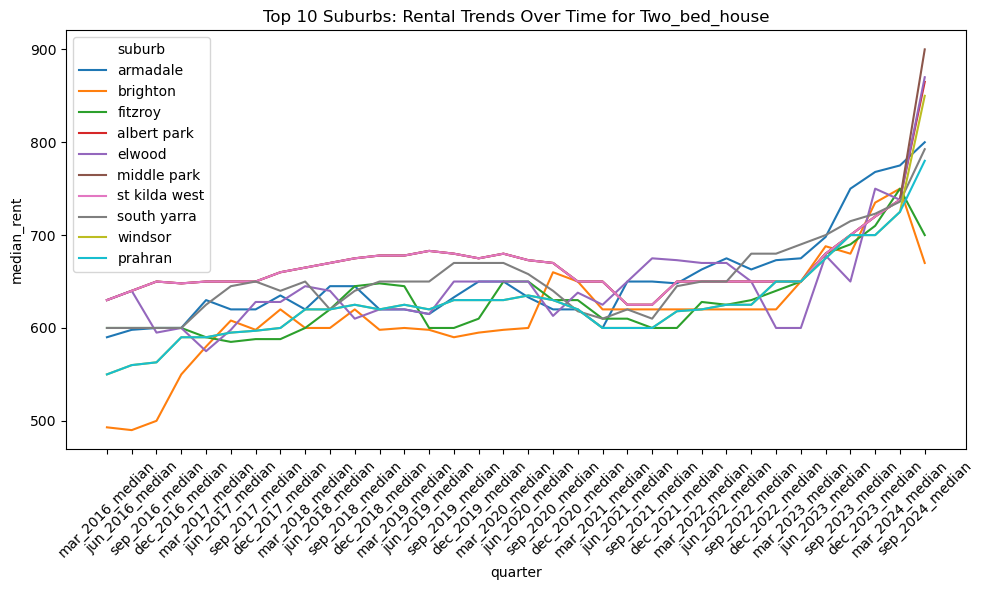

/var/folders/bz/yjywszk15kxc8d5vv73k9xcc0000gn/T/ipykernel_28711/258792634.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental_data['suburb'] = rental_data['suburb'].str.lower()


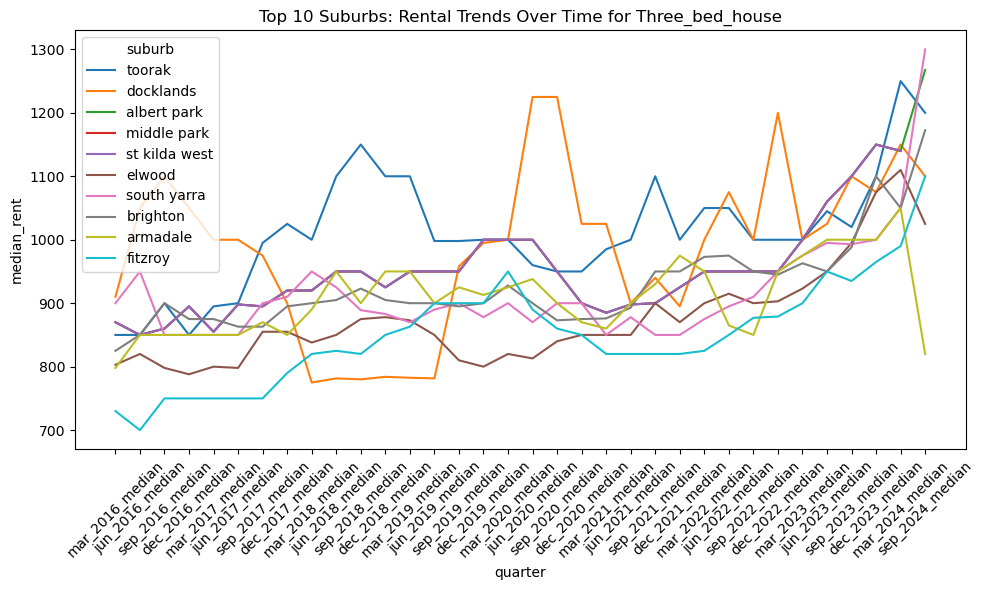

/var/folders/bz/yjywszk15kxc8d5vv73k9xcc0000gn/T/ipykernel_28711/258792634.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental_data['suburb'] = rental_data['suburb'].str.lower()


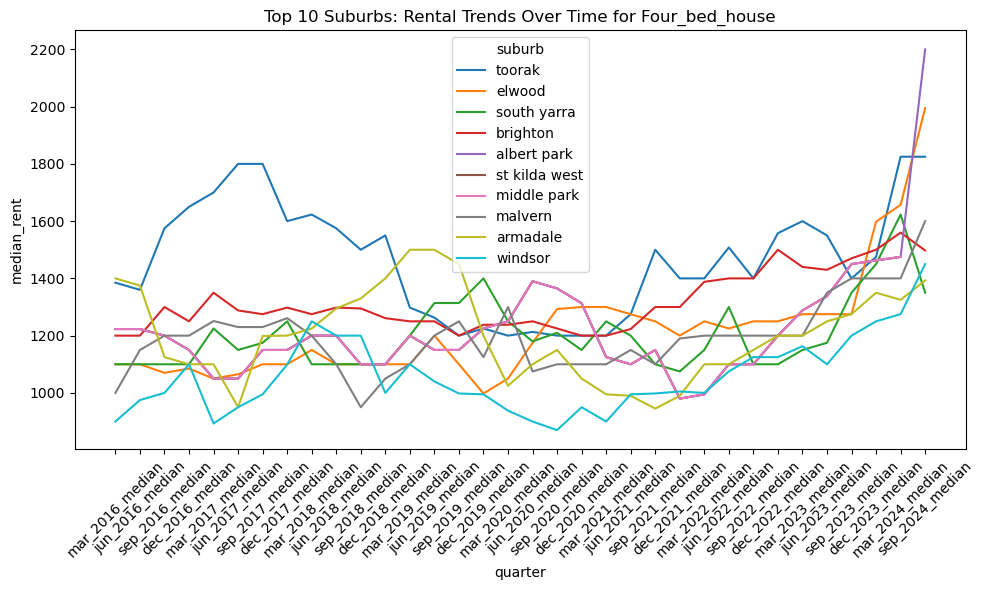

/var/folders/bz/yjywszk15kxc8d5vv73k9xcc0000gn/T/ipykernel_28711/258792634.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental_data['suburb'] = rental_data['suburb'].str.lower()


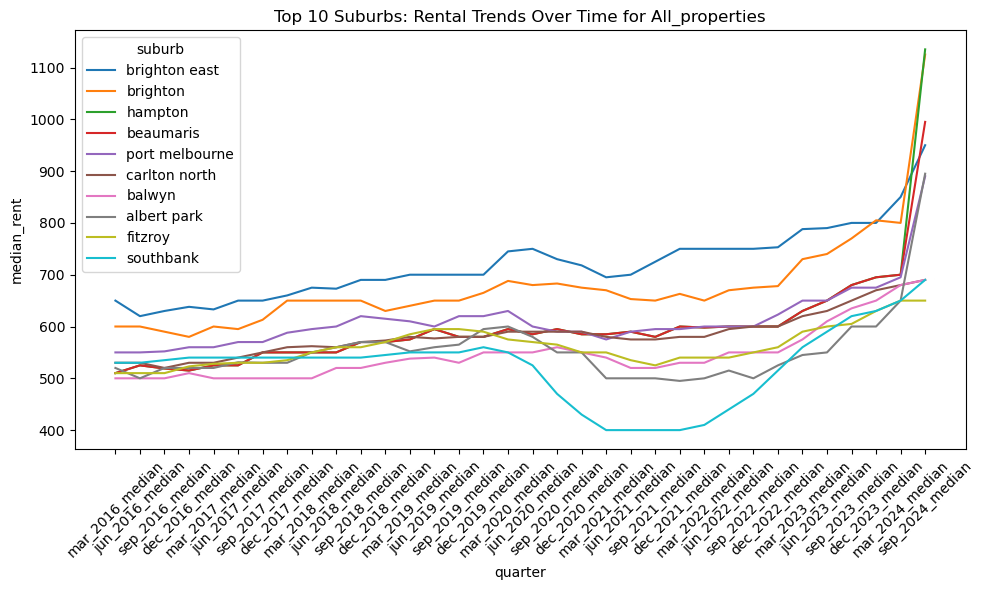

In [5]:
# List of different files and their domain counterparts (replace with actual filenames)
rental_files = {'one_bed_flat': one_bed_flat, 'two_bed_flat': two_bed_flat, 'three_bed_flat': three_bed_flat, 'two_bed_house': two_bed_house,
                'three_bed_house': three_bed_house, 'four_bed_house': four_bed_house, 'all_properties': all_properties}
domain_files = {'one_bed_flat': domain_one_bed_flat, 'two_bed_flat': domain_two_bed_flat, 'three_bed_flat': domain_three_bed_flat, 'two_bed_house': domain_two_bed_house,
                'three_bed_house': domain_three_bed_house, 'four_bed_house': domain_four_bed_house, 'all_properties': domain_all_properties}

# Iterate over each file and generate the plots
for file_name, rental_data in rental_files.items():
    
    # Remove 'group total'
    rental_data = rental_data[rental_data['suburb'].str.lower() != 'group total']
    
    # Merge with Domain data
    domain_data = domain_files[file_name]
    domain_data['suburb'] = domain_data['suburb'].str.lower()
    rental_data['suburb'] = rental_data['suburb'].str.lower()
    
    rental_data = rental_data.merge(domain_data[['suburb', 'median_rent']], on='suburb', how='left')
    rental_data.rename(columns={'median_rent': 'sep_2024_median'}, inplace=True)
    
    # Sort and melt data
    top_10_suburbs = rental_data.sort_values(by='mar_2024_median', ascending=False).head(10)
    top_10_melted = top_10_suburbs.melt(id_vars=['suburb'], var_name='quarter', value_name='median_rent')

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=top_10_melted, x='quarter', y='median_rent', hue='suburb')
    plt.xticks(rotation=45)
    plt.title(f'Top 10 Suburbs: Rental Trends Over Time for {file_name.capitalize()}')
    plt.tight_layout()
    plt.show()


In [14]:
# Merge the domain rental data with the GeoDataFrame
merged_gdf = vic_suburbs_gdf.merge(domain_one_bed_flat, on='suburb', how='inner')

# Drop unnecessary columns (if not needed)
merged_gdf = merged_gdf.drop(columns=['PFI_CR', 'UFI_OLD', 'UFI_CR'], errors='ignore')

# Simplify geometries for faster map rendering (optional)
merged_gdf['geometry'] = merged_gdf['geometry'].simplify(0.001)  # Adjust tolerance as needed

# Create a Folium map centered at Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=10)

# Add a Choropleth map, coloring the polygons based on the number of properties
choropleth = folium.Choropleth(
    geo_data=merged_gdf.to_json(),  # Convert to JSON format
    data=merged_gdf,  # Data containing the values to color by
    columns=['suburb', 'num_properties'],  # Columns for mapping
    key_on='feature.properties.suburb',  # Match the 'suburb' field from GeoDataFrame
    fill_color='YlOrRd',  # Color scale (can be changed)
    fill_opacity=0.6,  # Adjust the fill opacity
    line_opacity=0.4,  # Adjust the line opacity for better boundaries
    legend_name='Number of Properties'
).add_to(m)

# Add tooltips for each suburb (optional, based on median rent and num_properties)
for i, row in merged_gdf.iterrows():
    folium.GeoJson(
        row['geometry'],
        tooltip=folium.Tooltip(f"Suburb: {row['suburb'].capitalize()}<br>Median Rent: ${row['median_rent']}<br>Properties: {row['num_properties']}")
    ).add_to(m)

# Save the map to an HTML file
m.save("../plots/domain_one_bed_map.html")


In [17]:
# Merge the domain rental data with the GeoDataFrame
merged_gdf = vic_suburbs_gdf.merge(domain_four_bed_house, on='suburb', how='inner')

# Drop unnecessary columns (if not needed)
merged_gdf = merged_gdf.drop(columns=['PFI_CR', 'UFI_OLD', 'UFI_CR'], errors='ignore')

# Create a Folium map centered at Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=10)

# Add a Choropleth map, coloring the polygons based on the number of properties
choropleth = folium.Choropleth(
    geo_data=merged_gdf.to_json(),  # Convert to JSON format
    data=merged_gdf,  # Data containing the values to color by
    columns=['suburb', 'num_properties'],  # Columns for mapping
    key_on='feature.properties.suburb',  # Match the 'suburb' field from GeoDataFrame
    fill_color='YlOrRd',  # Better color scale for value distinction
    fill_opacity=0.8,  # Increase opacity for better visibility
    line_opacity=0.1,  # Thinner lines for boundaries
    line_color='gray',  # Make boundaries a neutral color
    legend_name='Number of Properties',
    highlight=True  # Enable highlighting on hover
).add_to(m)

# Add tooltips for each suburb (optional, based on median rent and num_properties)
for i, row in merged_gdf.iterrows():
    folium.GeoJson(
        row['geometry'],
        tooltip=folium.Tooltip(f"Suburb: {row['suburb'].capitalize()}<br>Median Rent: ${row['median_rent']}<br>Properties: {row['num_properties']}")
    ).add_to(m)

# Save the map to an HTML file
m.save("../plots/domain_four_bed_house_map.html")

# To display the map in the notebook (optional)
# m


In [8]:
property_types = ['one_bed_flat', 'two_bed_flat', 'three_bed_flat', 'two_bed_house', 'three_bed_house', 'four_bed_house', 'all_properties']

highlighted_style = {
    'fillColor': '#0000FF',  # Blue fill color
    'color': 'blue',  # Boundary color
    'weight': 2.5,  # Boundary thickness
    'fillOpacity': 0.8  # Opacity of fill color
}


for property_type in property_types:
    merged_gdf = vic_suburbs_gdf.merge(domain_files[property_type], on='suburb', how='inner')  # domain_data_dict contains different data
    # Drop unnecessary columns (if not needed)
    merged_gdf = merged_gdf.drop(columns=['PFI_CR', 'UFI_OLD', 'UFI_CR'], errors='ignore')
    top_10_suburbs = merged_gdf.sort_values(by='num_properties', ascending=False).head(10)
    
    # Create the map
    m = folium.Map(location=[-37.8136, 144.9631], zoom_start=10)
    
    # Base map
    folium.Choropleth(
        geo_data=merged_gdf.to_json(),
        data=merged_gdf,
        columns=['suburb', 'num_properties'],
        key_on='feature.properties.suburb',
        fill_color='YlOrRd',
        fill_opacity=0.6,
        line_opacity=0.2,
        legend_name='Number of Properties'
    ).add_to(m)
    
    # Highlight top 10 suburbs
    for i, row in top_10_suburbs.iterrows():
        folium.GeoJson(
            row['geometry'],
            style_function=lambda x: highlighted_style,
            tooltip=folium.Tooltip(f"Suburb: {row['suburb'].capitalize()}<br>Median Rent: ${row['median_rent']}<br>Properties: {row['num_properties']}")
        ).add_to(m)

    # Save the map for this property type
    m.save(f"../plots/domain_{property_type}_top_10_map.html")


In [9]:
properties = pd.read_csv("../data/raw/properties.csv")

In [10]:
properties

,suburb,postcode,property_type,weekly_rent,bond,num_bed,num_bath,num_parkings,furnished,pets_allowed,coordinates
0,melbourne,3000,Apartment,530.0,2303.0,1,1,1,False,False,"-37.8102191,144.966267"
1,melbourne,3000,Apartment,500.0,2173.0,1,1,0,False,False,"-37.810779,144.9685513"
2,melbourne,3000,Apartment,470.0,2042.0,1,1,0,False,False,"-37.81441450000001,144.9539107"
3,melbourne,3000,Apartment,400.0,1738.0,1,1,0,True,False,"-37.8175167,144.9664983"
4,melbourne,3000,Apartment,520.0,2260.0,2,1,0,True,False,"-37.8099061,144.9711071"
...,...,...,...,...,...,...,...,...,...,...,...
13615,sunset strip,3922,House,800.0,3476.0,4,2,0,True,False,"-38.4959115,145.2640573"
13616,rosebud,3939,House,700.0,3042.0,4,3,2,False,False,"-38.3579258,144.9109711"
13617,cranbourne,3977,House,510.0,2216.0,3,1,6,False,False,"-38.0920656,145.2781526"
13618,cranbourne,3977,House,240.0,960.0,1,1,0,False,False,"-38.1019484,145.2876772"


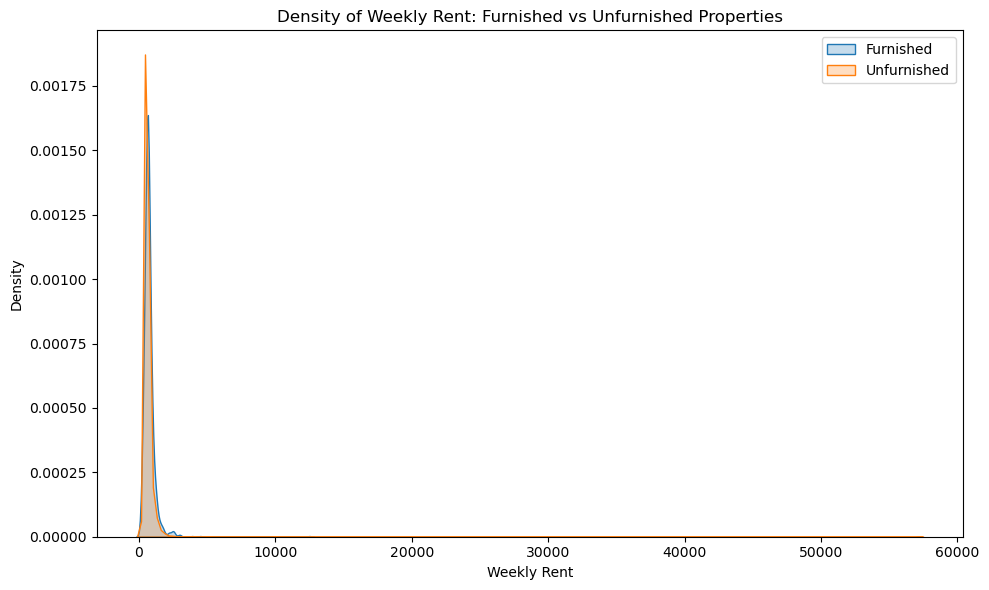

In [13]:
plt.figure(figsize=(10, 6))

# Plot the KDE for both furnished and unfurnished properties
sns.kdeplot(data=properties[properties['furnished'] == True], x='weekly_rent', label='Furnished', fill=True)
sns.kdeplot(data=properties[properties['furnished'] == False], x='weekly_rent', label='Unfurnished', fill=True)

# Add labels and title
plt.title('Density of Weekly Rent: Furnished vs Unfurnished Properties')
plt.xlabel('Weekly Rent')
plt.ylabel('Density')

# Show legend and plot
plt.legend()
plt.tight_layout()
plt.show()


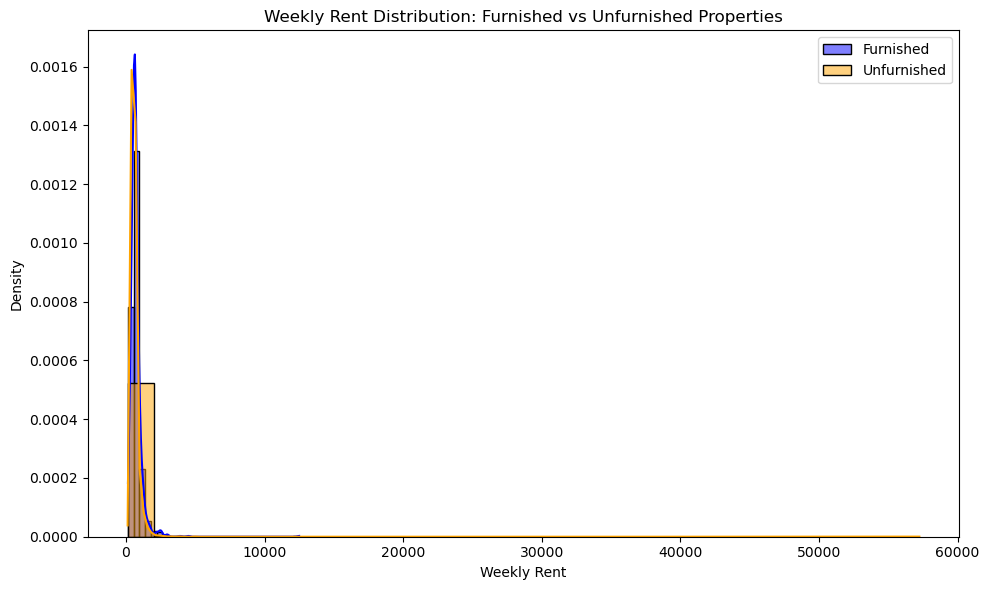

In [15]:
plt.figure(figsize=(10, 6))

# Plot histogram for furnished properties
sns.histplot(properties[properties['furnished'] == True]['weekly_rent'], label='Furnished', color='blue', kde=True, bins=30, stat="density", fill=True)

# Plot histogram for unfurnished properties
sns.histplot(properties[properties['furnished'] == False]['weekly_rent'], label='Unfurnished', color='orange', kde=True, bins=30, stat="density", fill=True)

# Add labels and title
plt.title('Weekly Rent Distribution: Furnished vs Unfurnished Properties')
plt.xlabel('Weekly Rent')
plt.ylabel('Density')

# Show legend and plot
plt.legend()
plt.tight_layout()
plt.show()


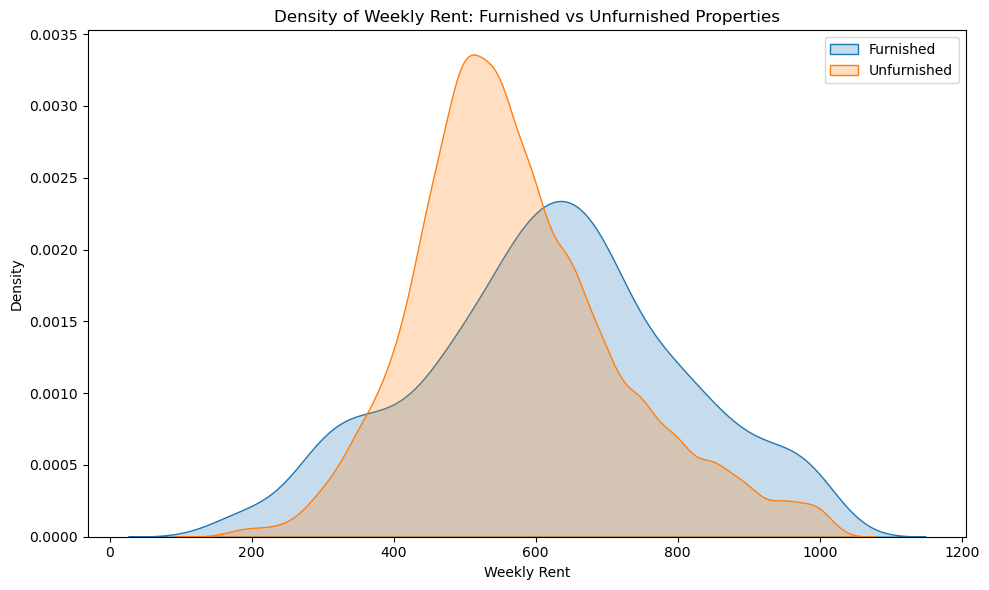

In [18]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = properties['weekly_rent'].quantile(0.25)
Q3 = properties['weekly_rent'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the data
filtered_properties = properties[(properties['weekly_rent'] >= lower_bound) & (properties['weekly_rent'] <= upper_bound)]

# Now plot using the cleaned dataset
plt.figure(figsize=(10, 6))

# Plot the KDE for both furnished and unfurnished properties
sns.kdeplot(data=filtered_properties[filtered_properties['furnished'] == True], x='weekly_rent', label='Furnished', fill=True)
sns.kdeplot(data=filtered_properties[filtered_properties['furnished'] == False], x='weekly_rent', label='Unfurnished', fill=True)

# Add labels and title
plt.title('Density of Weekly Rent: Furnished vs Unfurnished Properties')
plt.xlabel('Weekly Rent')
plt.ylabel('Density')

# Show legend and plot
plt.legend()
plt.tight_layout()
plt.show()


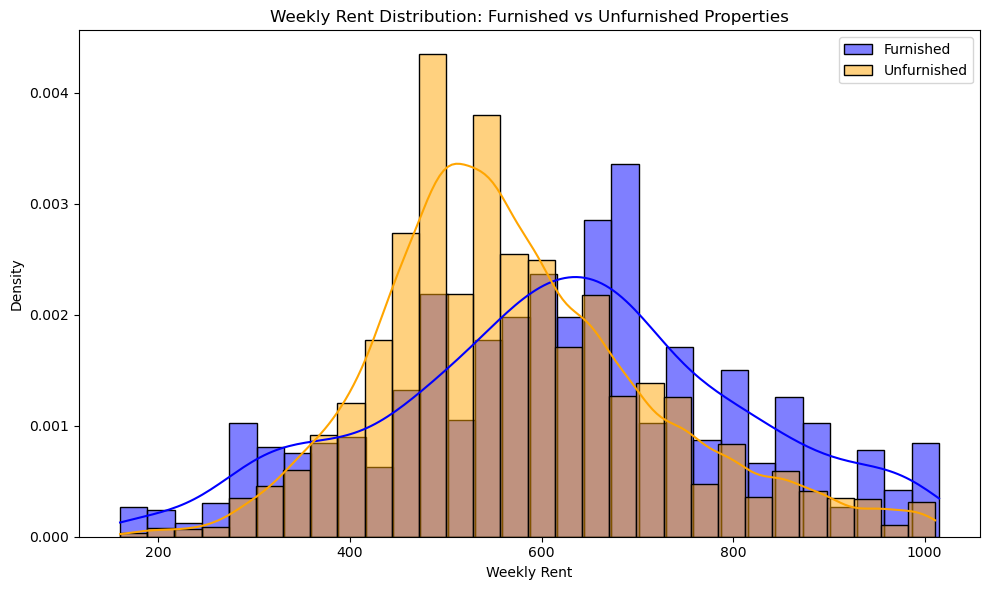

In [19]:
plt.figure(figsize=(10, 6))

# Plot histogram for furnished properties
sns.histplot(filtered_properties[filtered_properties['furnished'] == True]['weekly_rent'], label='Furnished', color='blue', kde=True, bins=30, stat="density", fill=True)

# Plot histogram for unfurnished properties
sns.histplot(filtered_properties[filtered_properties['furnished'] == False]['weekly_rent'], label='Unfurnished', color='orange', kde=True, bins=30, stat="density", fill=True)

# Add labels and title
plt.title('Weekly Rent Distribution: Furnished vs Unfurnished Properties')
plt.xlabel('Weekly Rent')
plt.ylabel('Density')

# Show legend and plot
plt.legend()
plt.tight_layout()
plt.show()


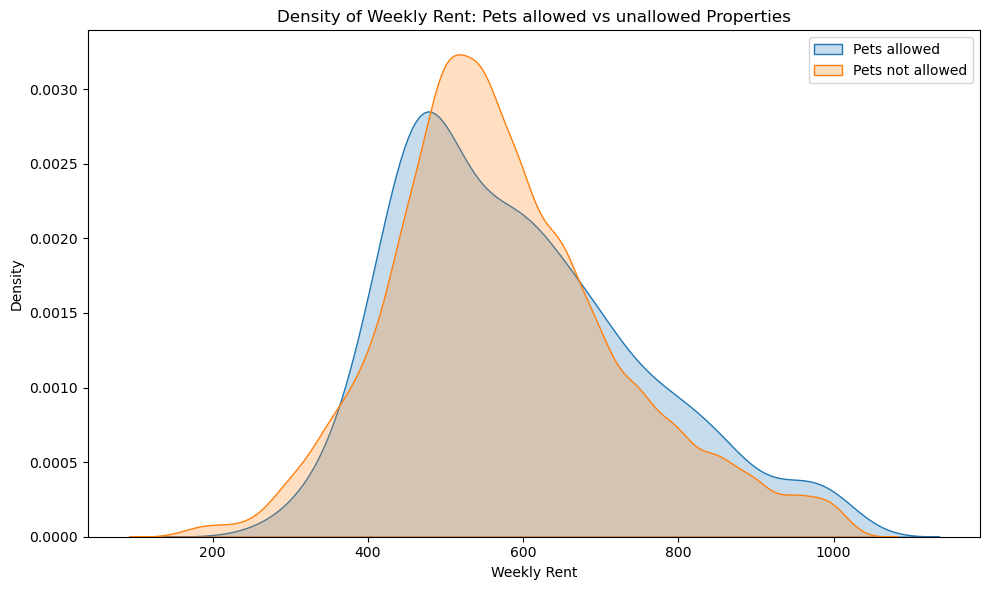

In [21]:
# Now plot using the cleaned dataset
plt.figure(figsize=(10, 6))

# Plot the KDE for both furnished and unfurnished properties
sns.kdeplot(data=filtered_properties[filtered_properties['pets_allowed'] == True], x='weekly_rent', label='Pets allowed', fill=True)
sns.kdeplot(data=filtered_properties[filtered_properties['pets_allowed'] == False], x='weekly_rent', label='Pets not allowed', fill=True)

# Add labels and title
plt.title('Density of Weekly Rent: Pets allowed vs unallowed Properties')
plt.xlabel('Weekly Rent')
plt.ylabel('Density')

# Show legend and plot
plt.legend()
plt.tight_layout()
plt.show()

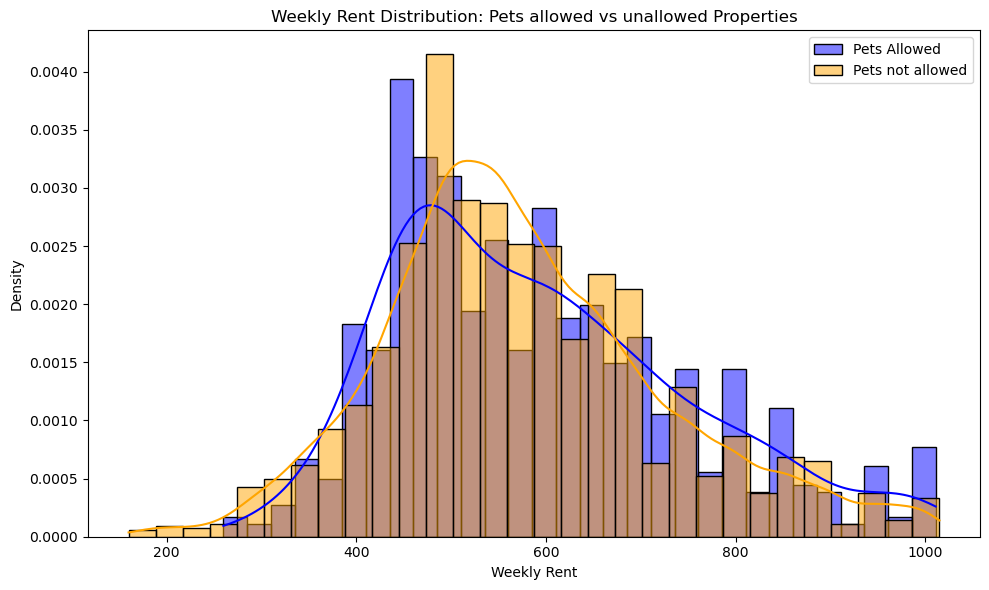

In [22]:
plt.figure(figsize=(10, 6))

# Plot histogram for furnished properties
sns.histplot(filtered_properties[filtered_properties['pets_allowed'] == True]['weekly_rent'], label='Pets Allowed', color='blue', kde=True, bins=30, stat="density", fill=True)

# Plot histogram for unfurnished properties
sns.histplot(filtered_properties[filtered_properties['pets_allowed'] == False]['weekly_rent'], label='Pets not allowed', color='orange', kde=True, bins=30, stat="density", fill=True)

# Add labels and title
plt.title('Weekly Rent Distribution: Pets allowed vs unallowed Properties')
plt.xlabel('Weekly Rent')
plt.ylabel('Density')

# Show legend and plot
plt.legend()
plt.tight_layout()
plt.show()


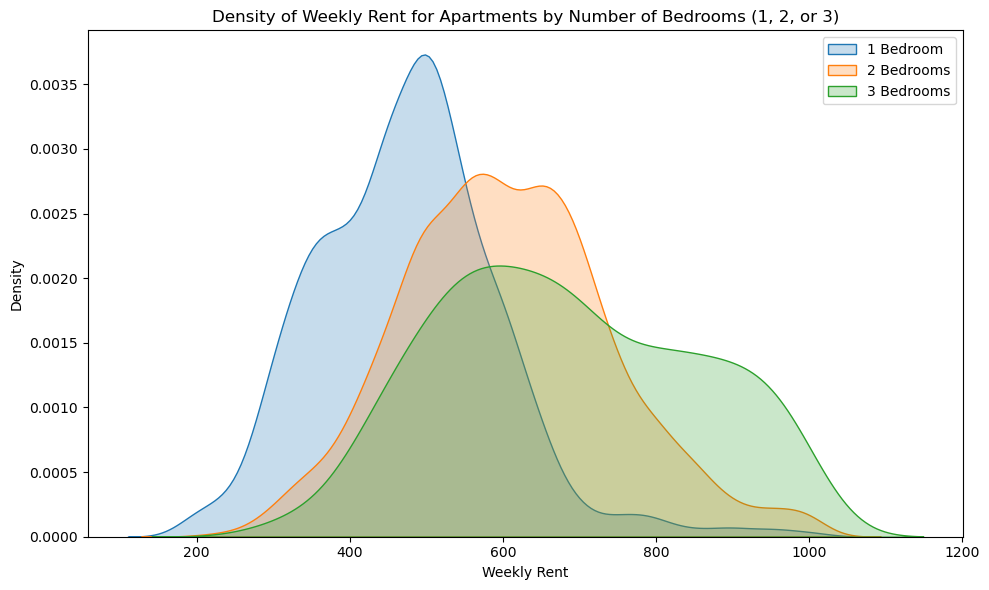

In [25]:
# Step 1: Filter the data for properties where property_type is "Apartment" and num_bed is 1, 2, or 3
apartment_properties = properties[(properties['property_type'] == 'Apartment') & (properties['num_bed'].isin([1, 2, 3]))]

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = properties['weekly_rent'].quantile(0.25)
Q3 = properties['weekly_rent'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the data
apartment_properties = apartment_properties[(apartment_properties['weekly_rent'] >= lower_bound) & (apartment_properties['weekly_rent'] <= upper_bound)]

# Step 2: Plot the KDE for weekly rent for apartments with 1, 2, or 3 bedrooms
plt.figure(figsize=(10, 6))

# KDE plot for 1-bedroom apartments
sns.kdeplot(data=apartment_properties[apartment_properties['num_bed'] == 1], x='weekly_rent', label='1 Bedroom', fill=True)

# KDE plot for 2-bedroom apartments
sns.kdeplot(data=apartment_properties[apartment_properties['num_bed'] == 2], x='weekly_rent', label='2 Bedrooms', fill=True)

# KDE plot for 3-bedroom apartments
sns.kdeplot(data=apartment_properties[apartment_properties['num_bed'] == 3], x='weekly_rent', label='3 Bedrooms', fill=True)

# Add labels and title
plt.title('Density of Weekly Rent for Apartments by Number of Bedrooms (1, 2, or 3)')
plt.xlabel('Weekly Rent')
plt.ylabel('Density')

# Show legend and plot
plt.legend()
plt.tight_layout()
plt.show()

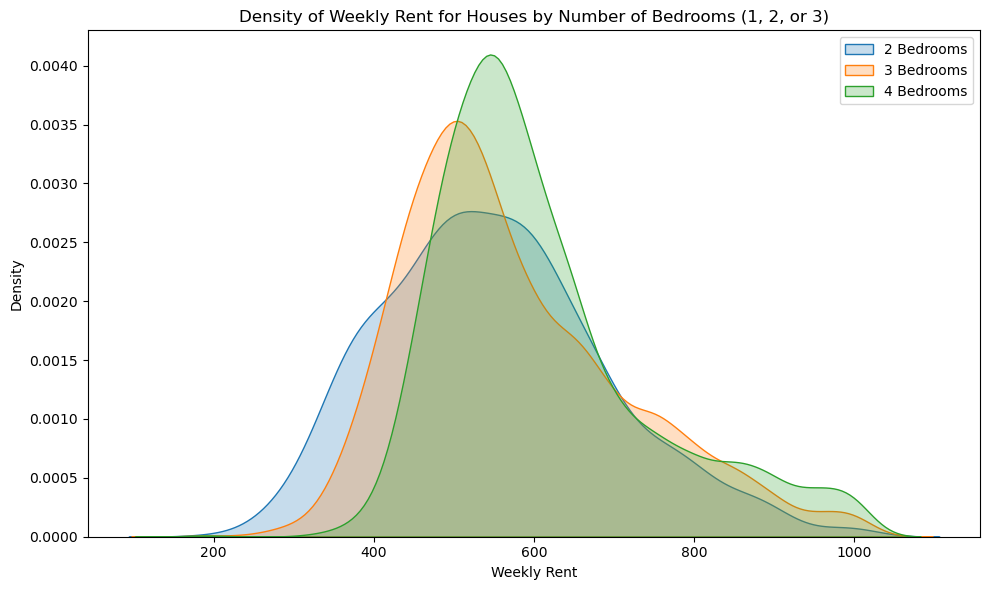

In [27]:
# Step 1: Filter the data for properties where property_type is "house" and num_bed is 2,3,4
house_properties = properties[(properties['property_type'] == 'House') & (properties['num_bed'].isin([2, 3, 4]))]

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = properties['weekly_rent'].quantile(0.25)
Q3 = properties['weekly_rent'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the data
house_properties = house_properties[(house_properties['weekly_rent'] >= lower_bound) & (house_properties['weekly_rent'] <= upper_bound)]

# Step 2: Plot the KDE for weekly rent for houses with 1, 2, or 3 bedrooms
plt.figure(figsize=(10, 6))

# KDE plot for 1-bedroom houses
sns.kdeplot(data=house_properties[house_properties['num_bed'] == 2], x='weekly_rent', label='2 Bedrooms', fill=True)

# KDE plot for 2-bedroom houses
sns.kdeplot(data=house_properties[house_properties['num_bed'] == 3], x='weekly_rent', label='3 Bedrooms', fill=True)

# KDE plot for 3-bedroom houses
sns.kdeplot(data=house_properties[house_properties['num_bed'] == 4], x='weekly_rent', label='4 Bedrooms', fill=True)

# Add labels and title
plt.title('Density of Weekly Rent for Houses by Number of Bedrooms (1, 2, or 3)')
plt.xlabel('Weekly Rent')
plt.ylabel('Density')

# Show legend and plot
plt.legend()
plt.tight_layout()
plt.show()